## ChangeFinder library 

#### r:
Indicates how much past influence is controlled when calculating the forgetting parameter probability density function. Decreasing this value will increase the influence of the past and increase the variation of the change points.

#### order:
Sets the order of the AR model and how far past values ​​are included in the model.

#### smooth: 
The range of smoothing. The longer this is, the more out- of-range values ​​will be captured, but the larger the value, the more difficult it will be to grasp the changes themselves.

./Documents/namiki_excel/11064reverse.xlsx


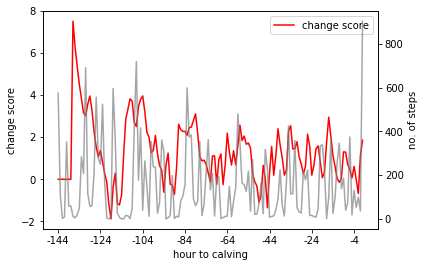

./Documents/namiki_excel/81257reverse.xlsx


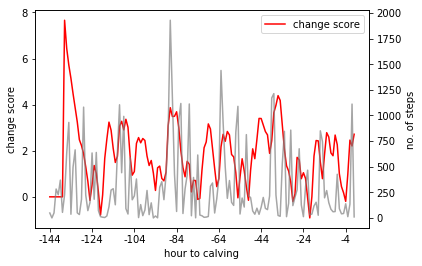

In [12]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import changefinder
import numpy as np

filenames = sorted(glob.glob('./Documents/namiki_excel/*reverse.xlsx'))
for f in filenames:
    print(f)
    df = pd.read_excel(f)
    #df = df.dropna(how='all')

    data = df[['step']].values
    #df = df.iloc[2:]

    cf = changefinder.ChangeFinder (r = 0.5, order = 1, smooth = 5)

    ret = []
    for i in data:
        score = cf.update (i)
        ret.append (score)

    fig = plt.figure ()
    ax = fig.add_subplot (111)
    ax.plot (ret, color = 'r', label='change score')
    ax2 = ax.twinx ()
    ax2.plot (data, 'grey', label='steps', alpha = 0.7)
    
    ax.set_xlabel('hour to calving')
    ax.set_ylabel('change score')
    ax2.set_ylabel('no. of steps')
    #ax.set_title('Sine wave')
    
    legend = ax.legend(loc='best')
    
    labels = ['-164','-144','-124','-104','-84','-64','-44', '-24', '-4']
    

    ax.set_xticklabels(labels)    
    #plt.title(format(f[:-5]))
    #plt.gca().invert_xaxis()
    
    plt.savefig(f'{f[:-5]}_steps_005_1_4.jpg', bbox_inches='tight')
    
    plt.show ()
    
    
    #plt.savefig(f'{f[:-5]}_steps_003_1_3.jpg', bbox_inches='tight')

### Separate change score plot

./Documents/namiki_excel/11064reverse.xlsx


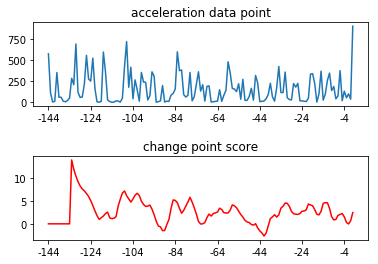

./Documents/namiki_excel/81257reverse.xlsx


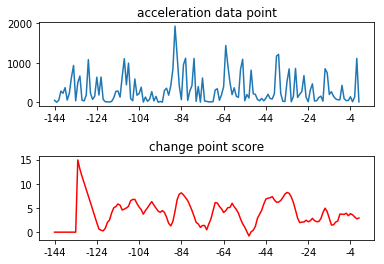

In [13]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import changefinder


filenames = sorted(glob.glob('./Documents/namiki_excel/*reverse.xlsx'))
for f in filenames:
    print(f)
    df = pd.read_excel(f)
   # df = df.dropna(how='all')

    points = df[['step']].values

    f, (ax1, ax2) = plt.subplots(2,1)
    f.subplots_adjust(hspace=0.6)
    ax1.plot(points)
    ax1.set_title("acceleration data point")
    labels = ['-164','-144','-124','-104','-84','-64','-44', '-24', '-4']
    
    ax1.set_xticklabels(labels)  
 
    #Initiate changefinder function
    cf = changefinder.ChangeFinder()
    scores = [cf.update(p) for p in points]
    ax2.plot(scores, color='r')
    ax2.set_title("change point score")
    

    ax2.set_xticklabels(labels)  
    
    
    plt.show() 
    
    
    #plt.savefig(f'{f[:-10]}-.jpg', bbox_inches='tight')